# Practical 2: Statistics and time series tests

<div class="alert alert-block alert-success">
<b>Objectives:</b> In this notebook we are going to use Pandas to load a spreadsheet of time series data and perform some statistical analysis on it. This includes tests to better understand the varying nature of our time-series dataset. As with the previous notebook, we build our excises around a set of key objectives that are listed below.
        
 - 1) [Using Pandas to create a dataframe](#Part1)
      * [Exercise 1: Merge air quality and meteorological dataset into a new dataframe.](#Exercise1)
 - 2) [Statistical analysis on dataframes¶](#Part2)
      * [Exercise 2: Create a heatmap of correlation coefficients across a PM2.5 network](#Exercise2)
 - 3) [Testing for stationary and non-stationary data¶](#Part3)
      * [Exercise 3: Auto-correlation function (ACF) and Partial auto correlation function (PACF)](#Exercise3)
      * [Exercise 4: Granger casuality coefficients](#Exercise4)
 
As with our other notebooks, we will provide you with a template for plotting the results. Also please note that you should not feel pressured to complete every exercise in class. These practicals are designed for you to take outside of class and continue working on them. Proposed solutions to all exercises can be found in the 'Solutions' folder.
</div>

Statistics and statistical tests play a crucial role in understanding and working with time-series data. Time-series data involves observations taken over a specific period, often at regular intervals, and it presents unique challenges due to the temporal nature of the data points. Statistical analysis allows us to uncover meaningful patterns, trends, and relationships within time-series data, enabling us to make informed decisions and predictions. By applying statistical techniques such as descriptive statistics, regression analysis, and hypothesis testing, we can quantify the characteristics of the time-series, identify significant factors influencing its behavior, and assess the reliability of observed patterns. These tools provide a systematic framework for extracting insights from time-series data, enabling us to better understand and interpret the underlying dynamics, detect anomalies or outliers, and make accurate forecasts. Ultimately, statistical analysis empowers us to harness the power of time-series data and derive actionable insights for various fields, including finance, economics, climate science, and many others.

First we need to check what environment we are running this notebook in, so we can install and download/unzip files accordingly

In [ ]:
if 'google.colab' in str(get_ipython()):
    
    # Mount the Google Drive at mount
    from google.colab import drive
    mount='/content/gdrive'
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Switch to the directory on the Google Drive that you want to use
    import os
    from os import path
    
    drive_root = mount + "/My Drive/Colab Notebooks/MPEC/Time-series-analytics-course"
    # Change to the directories to get data files
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
        
else:
    print("not working in Google Colab!")

## 1). Using Pandas to open a CSV file and understanding a dataframe <a name="Part1"></a>

First let us load our dataset into a Pandas dataframe. If you remember from our last practical, we can use the internal Pandas function

```python
pd.read_csv(name of CSV file)
```

and then preview our dataframe using the 

```python
<<name of dataframe>>.head()
```
function. We do this below by loading in a CSV file that stores information from a given AURN site. 

In [1]:
#Lets load in some data using the Pandas package. First we need to import that package.
import pandas as pd #Im using pd here as its easier to keep writing! You can use whatever you want, but it might help you to use 'pd' for now.
import os
import numpy as np
import seaborn as sns
import os
path=os.getcwd()

# Read data from file 'MAN3.csv' - downloaded from the AURN API
# We are going to use the function 'read_csv' within the Pandas package:
# Create a new dataframe with the AURN data
df = pd.read_csv(path+'/data/AURN/MAN3.csv')

# Notice how we call that function using the '.' operator?
# (Note the data file needs to be in the same directory that your jupyter notebook is based) You can control delimiters, rows, column names with read_csv (see later) 

# How do we preview the data file.
# Preview the first 5 lines of the loaded data 
df.head()

#Pandas has loaded the data into a dataframe. By using the extension .head() we can take a look at the data products 
#available. At the moment this looks like a matrix where the rows are simply data entries, rather than ordered by
#a particular variable, such as time of measurement or site name. At least we can scan the range of column headings
#and think about what we want to do next. By the way this is also a good way of ensuring you have loaded in the data
#you expect. Sound silly? If you work with lots of datafiles it can be easy to assume you are working on the correct
#one

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,date,O3,NO,NO2,NOXasNO2,SO2,PM2.5,NV2.5,V2.5,wd,...,temp,AT2.5,AP2.5,site,code,latitude,longitude,PM10,Ox,NOx
0,2017-01-01 00:00:00,32.26382,3.54940,28.96035,34.40269,1.51405,15.1,13.5,1.6,223.0,...,7.8,8.1,1003.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,61.22417,32.50975
1,2017-01-01 01:00:00,22.55141,5.82822,42.66724,51.60371,1.42536,5.0,2.7,2.3,227.3,...,7.5,7.7,1002.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,65.21865,48.49546
2,2017-01-01 02:00:00,30.08518,3.12230,30.79077,35.57824,1.00249,4.4,1.9,2.5,246.5,...,7.4,7.6,1001.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,60.87595,33.91307
3,2017-01-01 03:00:00,26.79227,2.39918,30.33751,34.01620,1.06902,3.2,2.2,1.0,353.0,...,7.2,7.8,1000.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,57.12978,32.73669
4,2017-01-01 04:00:00,24.49722,1.97167,27.91915,30.94234,1.20273,3.9,3.9,0.0,28.6,...,6.4,7.5,1000.0,Manchester Piccadilly,MAN3,53.48152,-2.237881,NaN,52.41637,29.89082


I can also check the data type of each column by using the 

```python
<<name of dataframe>>.dtypes
```
function. This is useful for a number of reasons that might include whether we need to convert between, for example, <code> string </code> to <code> float </code> to perform some numerical analysis. As we have already seen, we can also check whether we are using a format called <code> datetime </code>. As the name suggests, this format allows us to perform some really neat data manipulation on time series data.  In the code box below, I check the data types of columns stored in our meteorology dataframe using the <code> .dtypes </code> property of our dataframe. I then change the <code> date </code> column to a datetime format and make this the index of our dataframe. 

In [2]:
df['datetime'] = pd.to_datetime(df['date'])
df=df.set_index('datetime')
df.dtypes

date          object
O3           float64
NO           float64
NO2          float64
NOXasNO2     float64
SO2          float64
PM2.5        float64
NV2.5        float64
V2.5         float64
wd           float64
ws           float64
temp         float64
AT2.5        float64
AP2.5        float64
site          object
code          object
latitude     float64
longitude    float64
PM10         float64
Ox           float64
NOx          float64
dtype: object

As per the last practical, let's see how many rows we have. This isnt always the best way to calculate the number of unique entries as duplicate datapoints can be common, but now that we have created a dataframe we can see how many entries it has. We can do this via the following properties of our frame: 

```python
df.size
df.shape
df.ndim
```

In [3]:
# Lets also check the data frame size
size = df.size 
print("Size of dataframe =", size)
  
# dataframe.shape - gives the seperated number of rows, columns, etc
shape = df.shape 
print("Shape of dataframe =", shape)
  
# dataframe.ndim  - Number of dimensions. Do we have a 2D array, 3D array?? etc
ndim = df.ndim 
print("Number of dimensions =", ndim)

Size of dataframe = 1001952
Shape of dataframe = (47712, 21)
Number of dimensions = 2


That is quite a large number of observations! Let's jump straight into an exercise.

<div class="alert alert-block alert-success">
<b> Exercise 1: Merge the air quality and meteorological dataset into a new dataframe. <a name="Exercise1"></a> </b> 
    
Load the meteorological dataset used in the previous practical and merge the data dataframes on the common time index. Feel free to use the code from the first practical. 

</div>

In [4]:
#------'INSERT CODE HERE'------
#load in boundary layer height, temperature at 2m etc from ECMWF re-analysis data
bl_df=pd.read_csv(path+'/data/Reanalysis/Picc_ECMWF_data_new.csv')
# Convert this date string to datetime format
bl_df['datetime'] = 
# Set the index
bl_df=bl_df.set_index('datetime')
# Create a new data frame by merging the other two using the time index as the pivot 
combined_df=pd.merge(df[['NO2', 'NO', 'PM2.5', 'Ox', 'NOx','temp', 'ws', 'wd']],bl_df[['t2m','u10','v10','blh_final','sp','RH']], how='inner', left_index=True, right_index=True)
# Re-record time metrics in the new data frame
combined_df['hour']=combined_df.index.hour
combined_df['day']=combined_df.index.weekday
combined_df['month']=combined_df.index.month
combined_df['day_of_year']=combined_df.index.day_of_year
combined_df.head()
#------------------------------

,NO2,NO,PM2.5,Ox,NOx,temp,ws,wd,t2m,u10,v10,blh_final,sp,RH,hour,day,month,day_of_year
datetime,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,28.96035,3.54940,15.1,61.22417,32.50975,7.8,4.5,223.0,279.50064,2.443758,2.924213,445.04938,101463.320,0.928495,0,6,1,1
2017-01-01 01:00:00,42.66724,5.82822,5.0,65.21865,48.49546,7.5,4.2,227.3,279.22998,2.332650,3.196304,462.18268,101348.160,0.928607,1,6,1,1
2017-01-01 02:00:00,30.79077,3.12230,4.4,60.87595,33.91307,7.4,2.7,246.5,278.56464,2.213651,3.480007,457.56848,101247.140,0.939088,2,6,1,1
2017-01-01 03:00:00,30.33751,2.39918,3.2,57.12978,32.73669,7.2,3.1,353.0,278.51688,1.790367,3.617465,411.56964,101152.540,0.932534,3,6,1,1
2017-01-01 04:00:00,27.91915,1.97167,3.9,52.41637,29.89082,6.4,3.9,28.6,278.46472,1.589300,3.760885,401.37550,101014.664,0.934428,4,6,1,1


## 2). Statistical analysis on dataframes <a name="Part2"></a>

We have gone to all this trouble to build dataframes. We have practiced selecting a subset and also merging to create a new frame. We can also now perform common statistical operations on our data to try and understand any interesting relationships across multiple variables. 

### 2.1) Correlation coefficients

Correlation coefficients, typically ranging from -1 to +1, provide a numerical measure of the association between variables. A positive correlation coefficient indicates a positive relationship, meaning that as one variable increases, the other tends to increase as well. Conversely, a negative correlation coefficient signifies an inverse relationship, where one variable tends to decrease as the other increases. By quantifying these relationships, correlation coefficients help us understand the degree to which variables are related and how their values move in tandem.

Pandas has a variety of functions for generating stats from our data. In the following code I demonstrate how we can select a subset of our columns and look at the correlation coefficient between each variable. Let us work with our new combined dataframe 'combined_df'.

The first step is to create a correlation coefficient matrix. We can do that by telling Pandas which columns we are interested in:

```python
dataframe[['column 1','column 2','column 3'...etc]]
```

and then using the 

```python
.corr()
```

to this subset. We can remind ourselves of the columns associated with our dataframe:

In [5]:
combined_df.columns

Index(['NO2', 'NO', 'PM2.5', 'Ox', 'NOx', 'temp', 'ws', 'wd', 't2m', 'u10',
       'v10', 'blh_final', 'sp', 'RH', 'hour', 'day', 'month', 'day_of_year'],
      dtype='object')

Then we can derive our relevant coefficients using the following example. Please note we specify the type of coefficient through the variable <code> method </code> which can take one of either <code> pearson </code>,<code> kendall </code> or <code> spearman </code>. You can find more information on which is the most appropriate in the course notes.

The covariance can be normalised by the product of the standard deviation of each variable to give the Pearson Correlation Coefficient; sometimes referred to as Pearsons’ R. A high correlation between two random variables indicates that the two are associated, but that their relationship is not necessarily causal. One criteria of using Pearson coefficient is that the data you are analyzing should be normally distributed. There are ways to check this is the case, and one of the easiest can be through a histogram of the distribution of data. Do you remember how to do this? In the following code we jump straight into generating a correlation coefficient matrix.

In [6]:
corr = combined_df[['temp','ws','RH','u10','v10','blh_final','NO2','PM2.5']].corr(method='pearson')
print("Correlation coefficient matrix = ", corr)

Correlation coefficient matrix =                 temp        ws        RH       u10       v10  blh_final  \
temp       1.000000  0.179523 -0.481948 -0.003686  0.185130   0.322455   
ws         0.179523  1.000000 -0.139063  0.317128  0.460764   0.529102   
RH        -0.481948 -0.139063  1.000000  0.032084  0.108375  -0.580028   
u10       -0.003686  0.317128  0.032084  1.000000  0.328566   0.337802   
v10        0.185130  0.460764  0.108375  0.328566  1.000000   0.147016   
blh_final  0.322455  0.529102 -0.580028  0.337802  0.147016   1.000000   
NO2       -0.379419 -0.287699  0.222669 -0.139536 -0.034218  -0.297877   
PM2.5     -0.114714 -0.235072  0.017098 -0.293125 -0.120657  -0.224065   

                NO2     PM2.5  
temp      -0.379419 -0.114714  
ws        -0.287699 -0.235072  
RH         0.222669  0.017098  
u10       -0.139536 -0.293125  
v10       -0.034218 -0.120657  
blh_final -0.297877 -0.224065  
NO2        1.000000  0.417121  
PM2.5      0.417121  1.000000  


So here we have our correlation coefficients! It would be much easier to visualise this somehow. A popular plotting module used with Pandas is [Seaborn](https://seaborn.pydata.org) which we have already used to produce jointplots and box-plots.

Check out the code snippet below:

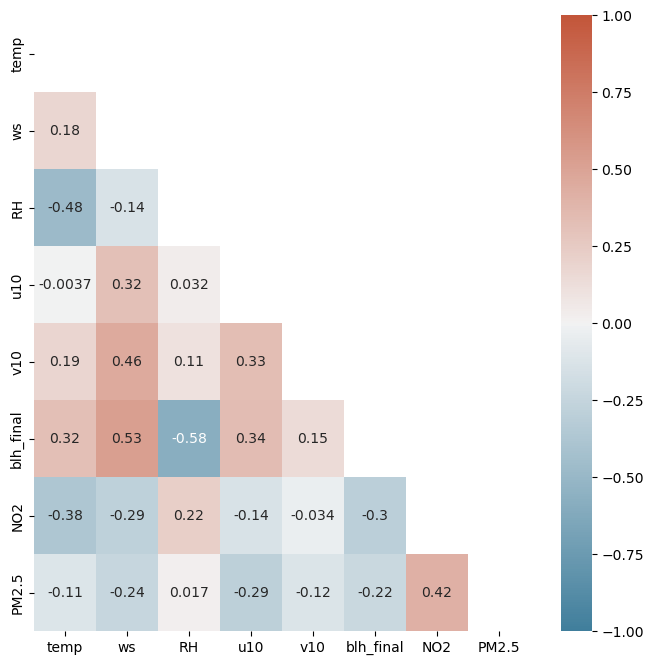

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# calculate the correlation matrix
corr = combined_df[['temp','ws','RH','u10','v10','blh_final','NO2','PM2.5']].corr(method='pearson')
# Now use an internal function within Seaborn called '.heatmap'
# Set up the matplotlib plot configuration
fig, ax = plt.subplots(figsize=(8, 8))
# Generate a mask for upper triangle - we want to block this out
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, vmin=-1, vmax=1,cmap=cmap,xticklabels=corr.columns, yticklabels=corr.columns)
# And we now need to show the plot.
plt.show()

We can switch the correlation coefficient method quite easily. In the following code snippet we repeat the above but use the spearman coefficient. 

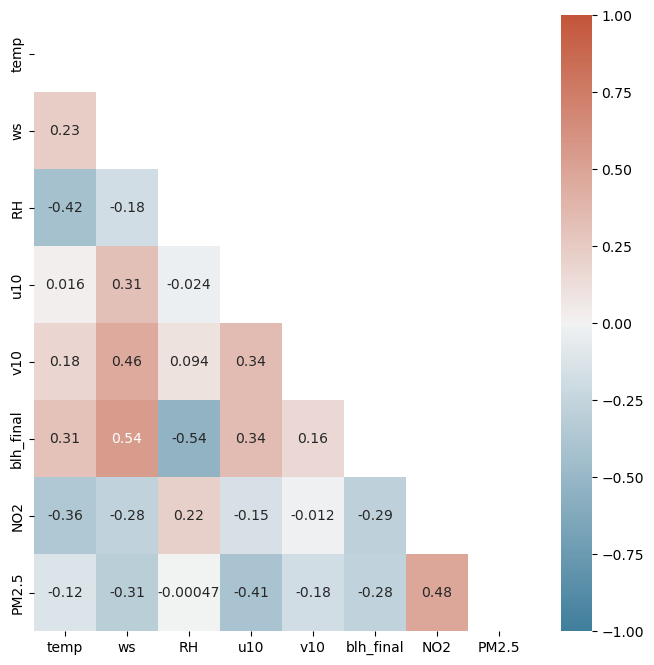

In [8]:
# calculate the correlation matrix
corr = combined_df[['temp','ws','RH','u10','v10','blh_final','NO2','PM2.5']].corr(method='spearman')
# Now use an internal function within Seaborn called '.heatmap'
# Set up the matplotlib plot configuration
fig, ax = plt.subplots(figsize=(8, 8))
# Generate a mask for upper triangle - we want to block this out
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, vmin=-1, vmax=1,cmap=cmap,xticklabels=corr.columns, yticklabels=corr.columns)
# And we now need to show the plot.
plt.show()

We can select some interesting observations here. Take the coeffcient between $NO_{2}$ and wind speed ($ws$) and boundary layer height $blh_final$. 

### 2.1) Comparison across a distributed network

Up to this point we have looked at data taken from the AURN network; a limited coverage of two monitoring sites. We also have access to our own managed network funded by the Alan Turing institute with lower costs sensors across Greater Manchester. In the following we are going to load this extra data in, including data from our air quality supersite to support total PM mass measurements with information on composition; specifically black carbon. 

We have multiple files that contain data from each sensor. In the previous notebook we merged different dataframes on a common time index. We will repeat that here but will need to do so for more than 2 dataframes. We will do this sequentially. 

We retain our focus on PM2.5, with the following individual sensor labels in our final dataset:

 - SS_PM2.5
 - 438_SS_pm25
 - 454_SS_pm25
 - 459_SS_pm25
 - 461_SS_pm25
 - 430_pm25
 - 427_pm25
 - 435_pm25
 
Where <code> SS_PM2.5 </code> refers to data taken from a reference grade instrument at the air quality supersite and all others from low cost sensors placed elsewhere. We also load in concentration data on Black Carbon from the supersite:

 - BC_Conc
 
and wrap in the same re-analysis dataset we have used up to this point. Whilst we have so far made sure all of our data merged on times when data was available from all sources, in this instance we are going to keep data gaps in our data frame. Often, from network measurements, we have gaps with regards to sensor coverage. Using the total time series is, however, still useful.

In the following we provide you with code to load the different datafiles in. They may have particular steps to filter data out. Each takes a slightly different approach to coverting a time-stamp to a datetime format. When you read a CSV file in Pandas, you can specify which column will act as the index. In some cases, Pandas will directly covert the text to a <code> datetime </code> format. In other cases, we need to specify the datetime format, but this is done for you. 

You may find the operations below take a few seconds to a minute to complete. 


In [9]:
import os
path=os.getcwd()

# - FIDAS PM data
ss_df = pd.read_csv(path+'/data/Supersite/FIRS_FIDAS_2022.csv',index_col="datetime", parse_dates=True, dayfirst=True)
# supersite user define data filtering - specifying values above 200 to ignore
ss_df.loc[(ss_df["SS_PM2.5"] > 200), "SS_PM2.5"] = np.nan
# the original data is provided using a high temporal resolution, so we resample the dataframe to 1 minute average.
ss_df = ss_df.resample("60s").mean()
ss_df['date_stamp']=ss_df.index.values

# - Black Carbon data
bc_df = pd.read_csv(path+'/data/Supersite/FIRS_BC_2022.csv',index_col="datetime", parse_dates=True, dayfirst=True)
bc_df = bc_df.resample("60s").mean()
bc_df['date_stamp']=bc_df.index.values

# - Sensor 438
sensor_438_df = pd.read_csv(path+'/data/Supersite/MOD-PM-00438-SS.csv',index_col="timestamp_local", parse_dates=True)
sensor_438_df.index = sensor_438_df.index.strftime('%d/%m/%y %H:%M:%S')
sensor_438_df.index = pd.to_datetime(sensor_438_df.index, format='%d/%m/%y %H:%M:%S')
sensor_438_df = sensor_438_df.resample("60s").mean()
sensor_438_df['date_stamp']=sensor_438_df.index.values


# - Sensor 454
sensor_454_df = pd.read_csv(path+'/data/Supersite/MOD-PM-00454-SS.csv',index_col="timestamp_local", parse_dates=True)
sensor_454_df.index = sensor_454_df.index.strftime('%d/%m/%y %H:%M:%S')
sensor_454_df.index = pd.to_datetime(sensor_454_df.index, format='%d/%m/%y %H:%M:%S')
sensor_454_df = sensor_454_df.resample("60s").mean()
sensor_454_df['date_stamp']=sensor_454_df.index.values


# - Sensor 459
sensor_459_df = pd.read_csv(path+'/data/Supersite/MOD-PM-00459-SS.csv',index_col="timestamp_local", parse_dates=True)
sensor_459_df.index = sensor_459_df.index.strftime('%d/%m/%y %H:%M:%S')
sensor_459_df.index = pd.to_datetime(sensor_459_df.index, format='%d/%m/%y %H:%M:%S')
sensor_459_df = sensor_459_df.resample("60s").mean()
sensor_459_df['date_stamp']=sensor_459_df.index.values


# - Sensor 461
sensor_461_df = pd.read_csv(path+'/data/Supersite/MOD-PM-00461-SS.csv',index_col="timestamp_local", parse_dates=True)
sensor_461_df.index = sensor_461_df.index.strftime('%d/%m/%y %H:%M:%S')
sensor_461_df.index = pd.to_datetime(sensor_461_df.index, format='%d/%m/%y %H:%M:%S')
sensor_461_df = sensor_461_df.resample("60s").mean()
sensor_461_df['date_stamp']=sensor_461_df.index.values

# - Sensor 430
sensor_430_df = pd.read_csv(path+'/data/Supersite/MOD-PM-430.csv',index_col="timestamp", parse_dates=True)
sensor_430_df.index = sensor_430_df.index.strftime('%d/%m/%y %H:%M:%S')
sensor_430_df.index = pd.to_datetime(sensor_430_df.index, format='%d/%m/%y %H:%M:%S')
#sensor_430_df = sensor_430_df.resample("60s").mean()
sensor_430_df['date_stamp']=sensor_430_df.index.values

# - Sensor 427
sensor_427_df = pd.read_csv(path+'/data/Supersite/MOD-PM-427.csv',index_col="timestamp", parse_dates=True)
sensor_427_df.index = sensor_427_df.index.strftime('%d/%m/%y %H:%M:%S')
sensor_427_df.index = pd.to_datetime(sensor_427_df.index, format='%d/%m/%y %H:%M:%S')
#sensor_427_df = sensor_427_df.resample("60s").mean()
sensor_427_df['date_stamp']=sensor_427_df.index.values

# - Sensor 435
sensor_435_df = pd.read_csv(path+'/data/Supersite/MOD-PM-435.csv',index_col="timestamp", parse_dates=True)
sensor_435_df.index = sensor_435_df.index.strftime('%d/%m/%y %H:%M:%S')
sensor_435_df.index = pd.to_datetime(sensor_435_df.index, format='%d/%m/%y %H:%M:%S')
#sensor_435_df = sensor_435_df.resample("60s").mean()
sensor_435_df['date_stamp']=sensor_435_df.index.values




/var/folders/65/2qv7krbx5lq9c65w0tys5gdw0000gp/T/ipykernel_28997/3069138979.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sensor_438_df = sensor_438_df.resample("60s").mean()
/var/folders/65/2qv7krbx5lq9c65w0tys5gdw0000gp/T/ipykernel_28997/3069138979.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sensor_454_df = sensor_454_df.resample("60s").mean()
/var/folders/65/2qv7krbx5lq9c65w0tys5gdw0000gp/T/ipykernel_28997/3069138979.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeri

We have alot of data here. Lets preview one of the dataframes to check:

In [10]:
ss_df

,Cn (P/cm3),SS_PM1,SS_PM2.5,SS_PM10,SS_PM_Total,PM_Flag,date_stamp
datetime,,,,,,,
2022-01-01 00:01:00,117.7917,5.4,8.0,10.8,11.7,1.0,2022-01-01 00:01:00
2022-01-01 00:02:00,118.8843,5.5,8.1,11.1,12.1,1.0,2022-01-01 00:02:00
2022-01-01 00:03:00,125.1423,5.7,8.4,11.5,12.5,1.0,2022-01-01 00:03:00
2022-01-01 00:04:00,138.1469,6.2,8.9,12.1,13.2,1.0,2022-01-01 00:04:00
2022-01-01 00:05:00,153.9356,6.8,9.5,12.9,14.0,1.0,2022-01-01 00:05:00
...,...,...,...,...,...,...,...
2023-01-31 23:55:00,56.5012,4.4,8.4,13.5,16.1,1.0,2023-01-31 23:55:00
2023-01-31 23:56:00,56.5398,4.5,8.4,13.4,15.4,1.0,2023-01-31 23:56:00
2023-01-31 23:57:00,56.5869,4.5,8.4,13.3,15.1,1.0,2023-01-31 23:57:00


Likewise, we can preview one of the dataframes containing data from a networked sensor.

In [11]:
sensor_435_df

,435_Temp,435_PM1,435_PM10,435_PM2.5,430_RH,date_stamp
timestamp,,,,,,
2022-02-22 12:08:00,11.48,4.73,16.88,7.38,62.23,2022-02-22 12:08:00
2022-02-22 12:09:00,11.38,3.92,13.13,8.68,62.53,2022-02-22 12:09:00
2022-02-22 12:10:00,11.31,3.17,11.80,7.32,63.70,2022-02-22 12:10:00
2022-02-22 12:11:00,11.26,2.45,14.45,7.17,63.67,2022-02-22 12:11:00
2022-02-22 12:12:00,11.24,2.51,10.78,6.86,62.99,2022-02-22 12:12:00
...,...,...,...,...,...,...
2022-05-18 08:12:00,20.60,2.97,61.76,6.59,44.03,2022-05-18 08:12:00
2022-05-18 08:13:00,20.62,2.89,27.03,6.51,44.15,2022-05-18 08:13:00
2022-05-18 08:14:00,20.61,3.72,23.72,7.38,44.49,2022-05-18 08:14:00


In the next code block we start to combine the different datasets together. Notice how our aproach is a little bit different from last time in with regards to some of the merge statements. You will find we sequentially add/merge subsets of our dataframes. Ocne we confirm the index of our new dataframe, we then resample to produce hourly mean values. 

In [12]:
new_df=pd.merge(sensor_435_df[['435_PM2.5','435_PM10','date_stamp']],ss_df,how='right')
new_df=pd.merge(sensor_427_df[['427_PM2.5','427_PM10','date_stamp']],new_df,how='right')
new_df=pd.merge(sensor_430_df[['430_PM2.5','430_PM10','date_stamp']],new_df,how='right')
new_df=pd.merge(sensor_461_df[['461_SS_pm25','461_SS_pm10','date_stamp']],new_df,how='right')
new_df=pd.merge(bc_df,new_df,how='right')

#set the index of the new dataframe to be 'date_stamp'
new_df=new_df.set_index('date_stamp')
#Now resample the dataframe to generate hourly averages
new_df = new_df.resample("1H").mean()
# Need to bring back the column name to merge on
new_df['time']=new_df.index.values
new_df

,BC_Conc,UVPM_370_nm,BC_470 (ug/m3),BC_520 (ug/m3),BC_590 (ug/m3),BC_660 (ug/m3),BC_950 (ug/m3),qc_flag_BC,qc_flag_UVPM,qc_flag_BC_470,...,427_PM10,435_PM2.5,435_PM10,Cn (P/cm3),SS_PM1,SS_PM2.5,SS_PM10,SS_PM_Total,PM_Flag,time
date_stamp,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.567949,0.859525,0.740305,0.665559,0.636305,0.598898,0.569373,1.0,1.0,1.0,...,NaN,NaN,NaN,268.473585,10.293220,13.481356,17.228814,18.630508,1.0,2022-01-01 00:00:00
2022-01-01 01:00:00,0.384400,0.516367,0.469417,0.430333,0.419283,0.399800,0.385950,1.0,1.0,1.0,...,NaN,NaN,NaN,135.439275,5.721667,7.948333,10.180000,10.983333,1.0,2022-01-01 01:00:00
2022-01-01 02:00:00,0.350567,0.460583,0.426867,0.391917,0.382083,0.361900,0.351233,1.0,1.0,1.0,...,NaN,NaN,NaN,115.992537,4.415000,6.061667,7.825000,8.461667,1.0,2022-01-01 02:00:00
2022-01-01 03:00:00,0.345750,0.445483,0.414417,0.381633,0.372533,0.355200,0.346400,1.0,1.0,1.0,...,NaN,NaN,NaN,116.515345,4.148333,5.501667,7.430000,8.190000,1.0,2022-01-01 03:00:00
2022-01-01 04:00:00,0.386817,0.506483,0.466450,0.429083,0.419617,0.398417,0.387200,1.0,1.0,1.0,...,NaN,NaN,NaN,145.994422,5.208333,7.226667,10.286667,12.113333,1.0,2022-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 19:00:00,0.365614,0.462360,0.425272,0.390658,0.380939,0.369763,0.371351,1.0,1.0,1.0,...,31.794167,NaN,NaN,60.551508,4.818333,9.133333,15.475000,18.298333,1.0,2023-01-31 19:00:00
2023-01-31 20:00:00,0.348983,0.442483,0.404750,0.371333,0.364417,0.350367,0.354083,1.0,1.0,1.0,...,34.185000,NaN,NaN,60.197763,4.620000,8.786667,14.780000,17.255000,1.0,2023-01-31 20:00:00
2023-01-31 21:00:00,0.276833,0.361150,0.327800,0.300550,0.292400,0.282400,0.280133,1.0,1.0,1.0,...,32.989000,NaN,NaN,63.877782,4.578333,8.415000,13.386667,15.661667,1.0,2023-01-31 21:00:00


Now we can plot a number of the different PM time series to the screen as per the code block below

<Axes: xlabel='date_stamp'>

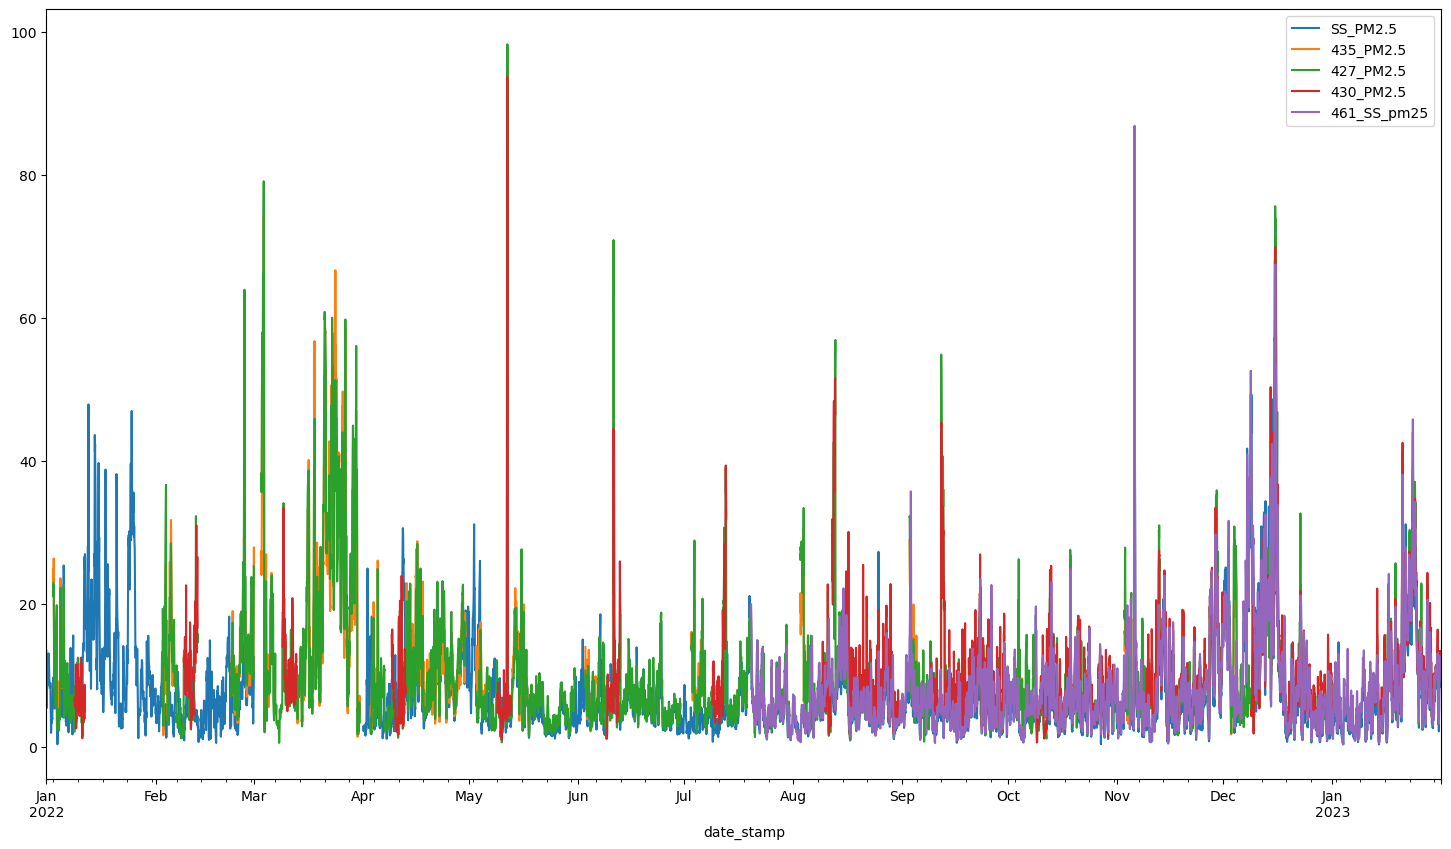

In [12]:
new_df[['SS_PM2.5','435_PM2.5','427_PM2.5','430_PM2.5','461_SS_pm25']].plot(figsize=(18,10))

Note that we have a number of periods where data is missing. This can be quite typical in realworld conditions!
Now that we have a wider collection of data on pollutant concentrations, we can once again merge this new dataset with meteorological data. We are going to assume that the reanalysis products we have used up to this point remain a useful representation across our network. Given this is a network from within the city region, this should be a good enough option. 

In fact, we will turn this requirement into the second exercise. 

<div class="alert alert-block alert-success">
<b> Exercise 2: Merge network air quality and meteorological data to probe relationships between PM data, Black Carbon and weather across the network. <a name="Exercise2"></a> </b> 
    
This is a fairly substantial exercise and can be broken down into the following tasks, each of which have a template already prodivded as code snippets below:
    
a) Correlation coefficients
 - Load the meteorological dataset used in the previous practical and merge with the existing <code> new_df </code> dataframe on a common time index. Feel free to use the code from the first practical. 
 - Set the index of the new dataframe to a datetime format
 - Create new time metrics including month and time of day
 - Create a correlation coefficient matrix of all pollutant and met variables, and plot using a heatmap. The list of variables to build a correlation coefficient heatmap from the new dataframe would be:
    
<code> ['SS_PM2.5','438_SS_pm25','454_SS_pm25','459_SS_pm25','461_SS_pm25','RH','BC_Conc','blh_final','t2m','u10','v10']</code>
  
b) Diurnal profiles
Using the dataframe created in part 'a', we now want to generate diurnal and mothly profiles for the following pollutant variables:
  
<code> ['SS_PM2.5','438_SS_pm25','BC_Conc']</code>
  
which represent the measured PM2.5 at the air quality Firs supersite, in the manchester metwork and black carbon measured at the supersite respectively. Note that our data is rather limited in that we only have one year, but we revisit this later on. Our dataframe has gaps. We need to make sure we create diurnal profiles across periods where there is data for each variable we are interested in. Here we provide you with another neat trick of pandas dataframes - <code> .dropna() </code>. This allows us to create a new dataframe, with only the pollutant variables we are interested in and for observations that occur in the same time period. Following this:
    
 - Create a figure with 3 subplots where the x variable is hour of day, and the y variable the pollutant of interest.
    
Once complete, you should produce figures that resemble the following:
    
       
</div>

#### Exercise 2a) - Correlation coefficients - complete code

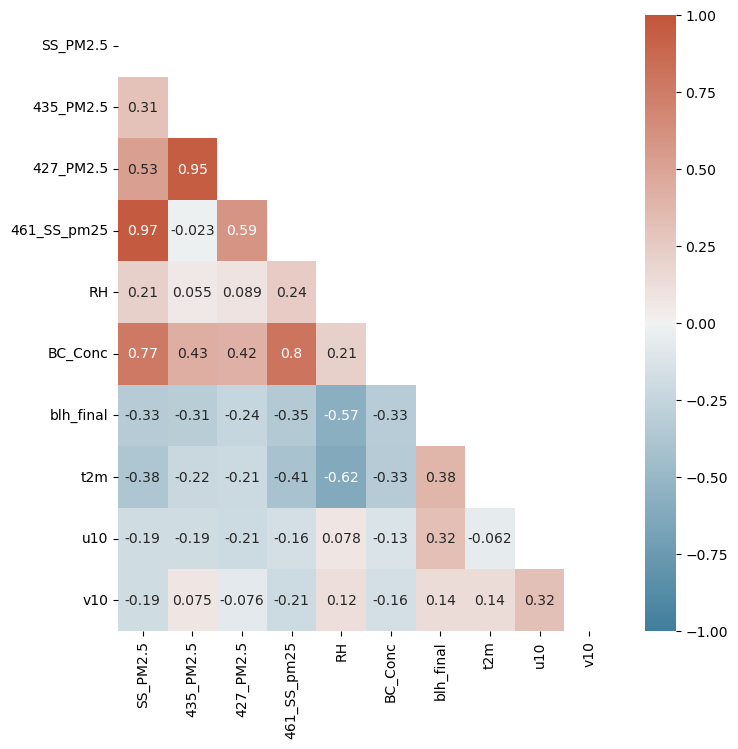

In [13]:
#load in boundary layer height, temperature at 2m etc from ECMWF re-analysis data
bl_df=pd.read_csv(path+'/data/Reanalysis/Picc_ECMWF_data_new.csv')
# Convert this date string to datetime format
bl_df['datetime'] = pd.to_datetime(bl_df['time'])
# Set the index
bl_df=bl_df.set_index('datetime')
# Create the same column that exists in the new_df dataframe to merge on
bl_df['time']=bl_df.index.values

#Now merge the two dataframes
new_df=pd.merge(bl_df,new_df,how='right')
#set the index of the new dataframe to be 'date_stamp'
new_df=new_df.set_index('time')

# Add extra time variable 
new_df['hour']=new_df.index.hour
new_df['day']=new_df.index.weekday
new_df['month']=new_df.index.month

# calculate the correlation matrix
corr = new_df[['SS_PM2.5','435_PM2.5','427_PM2.5','461_SS_pm25','RH','BC_Conc','blh_final','t2m', ]].corr(method='pearson')
# Now use an internal function within Seaborn called '.heatmap'
# Set up the matplotlib plot configuration
fig, ax = plt.subplots(figsize=(8, 8))
# Generate a mask for upper triangle - we want to block this out
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, vmin=-1, vmax=1,cmap=cmap,xticklabels=corr.columns, yticklabels=corr.columns)
# And we now need to show the plot.
plt.show()

#### Exercise 2b) - Boxplots of diurnal profiles - complete code

Text(0.5, 1.0, 'BC_Conc')

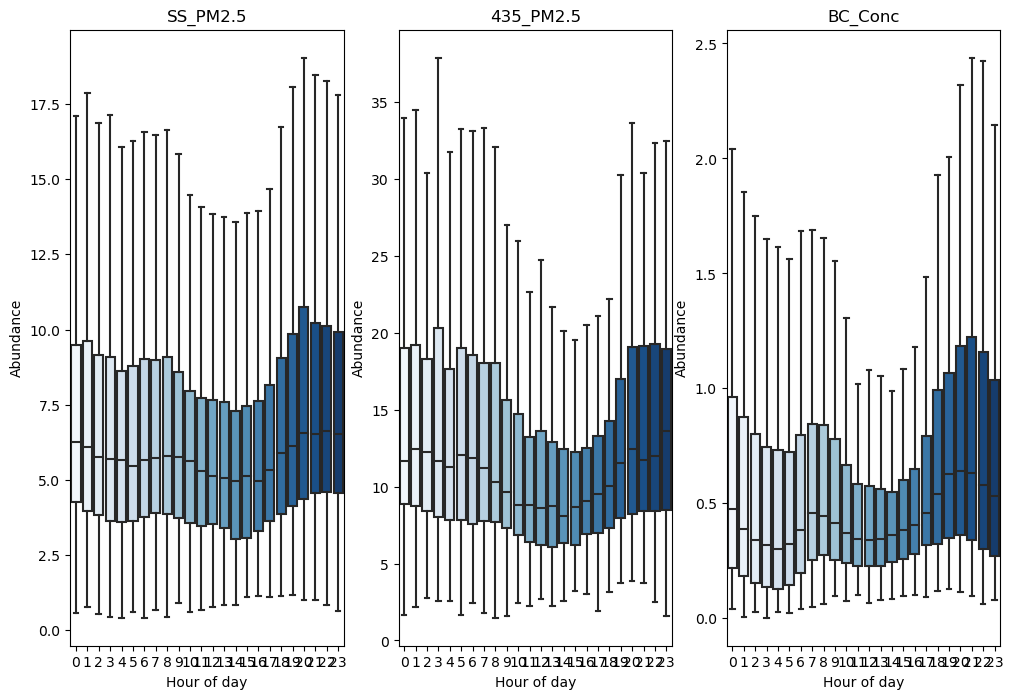

In [15]:
# Extract new dataframe where there are no NaN entries.
subset_df=new_df[['SS_PM2.5','435_PM2.5','427_PM2.5','461_SS_pm25','RH','BC_Conc','blh_final','t2m','u10','v10']]

# Create a set of diurnal boxplots for 'BC_Conc', 'SS_PM2.5'and '438_SS_pm25'
fig, axes = plt.subplots(1,3,figsize=(12,8))
sns.boxplot(data=subset_df,x=subset_df.index.hour, y=subset_df['SS_PM2.5'], ax=axes[0], showfliers=False, palette="Blues").set(xlabel='Hour of day',ylabel='Abundance')
sns.boxplot(data=subset_df,x=subset_df.index.hour, y=subset_df[ ], ax=axes[1], showfliers=False, palette="Blues").set(xlabel='Hour of day',ylabel='Abundance')
sns.boxplot(data=subset_df,x=subset_df.index.hour, y=subset_df['BC_Conc'], ax=axes[2], showfliers=False, palette="Blues").set(xlabel='Hour of day',ylabel='Abundance')
axes[0].set_title('SS_PM2.5')
axes[1].set_title('435_PM2.5')
axes[2].set_title('BC_Conc')

Would you be able to repeat the above for, say, only measurements taken in December?

What if we wanted to have a single boxplot where  we specify the colour (<code> hue </code> in the previous notebook) according to the different sites? We can use another combined property of Pandas dataframes and Seaborn called <code> melt </code>. In the following code block we create a 'melt' version of our dataframe which effectively stacks the data on top of each other. 

In [16]:
#melt data frame into long format
df_melted = pd.melt(subset_df[['SS_PM2.5','435_PM2.5','427_PM2.5','461_SS_pm25']])

#view first 10 rows of melted data frame
df_melted.head(10)

,variable,value
0,SS_PM2.5,13.481356
1,SS_PM2.5,7.948333
2,SS_PM2.5,6.061667
3,SS_PM2.5,5.501667
4,SS_PM2.5,7.226667
5,SS_PM2.5,8.258333
6,SS_PM2.5,8.226667
7,SS_PM2.5,8.515000
8,SS_PM2.5,8.561667
9,SS_PM2.5,8.876667


Now we can create a new boxplot and specify the hue by <code> variable </code>. In the proceeding plot, you will find that one measurement site is distinctly higher than the other.

Text(0.5, 1.0, 'Comparing PM2.5')

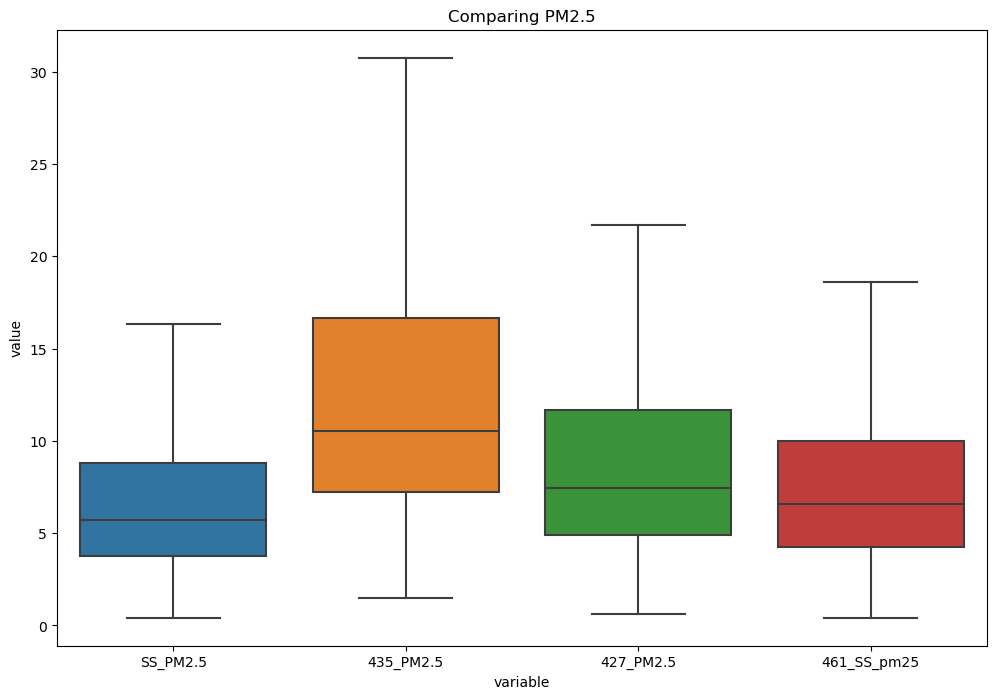

In [17]:
#create seaborn boxplots by group
fig, axes = plt.subplots(figsize=(12,8))
sns.boxplot(x='variable', y='value', showfliers=False, data=df_melted)
axes.set_title('Comparing PM2.5')

# 3) Testing for stationarity and seasonality

For time series data we also talk about whether the series is **stationary** or **non-stationary**. Before we define each in turn, take a look at time series displayed in Figure (3.1) below

<img src="images/stationary_examples.png" alt="Nine examples of time series data" style="width: 800px;"/>

*Figure 3.1 Nine examples of time series data; (a) Google stock price for 200 consecutive days; (b) Daily change in the Google stock price for 200 consecutive days; (c) Annual number of strikes in the US; (d) Monthly sales of new one-family houses sold in the US; (e) Annual price of a dozen eggs in the US (constant dollars); (f) Monthly total of pigs slaughtered in Victoria, Australia; (g) Annual total of lynx trapped in the McKenzie River district of north-west Canada; (h) Monthly Australian beer production; (i) Monthly Australian electricity production. [Original source](https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638)*

These univariate series may resemble any number of pollution time series. However they are fundamentally very different. We can see this by eye, but we can also start to characterise them in a numerically descriptive way. 
The original authors of the paper from which this figure is taken give several heuristics used to rule out stationarity in the above plots, corresponding to the basic characteristic of stationary processes (which we discuss shortly):

  - Prominent seasonality can be observed in series (d), (h) and (i).
  - Noticeable trends and changing levels can be seen in series (a), (c), (e), (f) and (i).
  - Series (i) shows increasing variance.

The authors also add that although the strong cycles in series (g) might appear to make it non-stationary, the timing of these cycles makes them unpredictable (due to the underlying dynamic dominating lynx population, driven partially by available feed). This leaves series (b) and (g) as the [only stationary series](https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638).


But what do we mean by stationary and seasonality? We define these below. The reason we would like to quantify these properties is because we may wish to understand what an appropriate model of our data might be. This could be used to time-series forecasting, but also to quantify *expected changes in signal from inferred or known processes*. Most forecasting methods assume that a distribution has stationarity. An absence of stationarity can cause unexpected or bizarre behaviors.

## 3.1) Stationarity

We first define a **stationary** process as follows. You may find some definitions a little contradictory, but we will summarise the key things we are looking for at the end of this section:

<blockquote> A stationary process has the property that the mean, variance and autocorrelation structure do not change over time. Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations (seasonality).</blockquote>

Clearly Figure (3.1) shows that the data does change; however the way it changes will not change with time if it is stationary. Going back to our previous figure, we said that *series (b) and (g) are the only stationary series*. The summary statistics will stay fairly constant. Notice already we are using terms such as *fairly*. We dont define these strictly. If the way it changes does not change with time, then we might expect a fairly simple
function describes the time evolution. If it does, then great!  

This leads us nicely to **non-stationary** time series. Take a look at the bottom plot in Figure (3.1). Unlike the previous figure, there is clearly a change in underlying trend with time. For a non-stationary time series we make the following distinction:

<blockquote>Entries in a non-stationary time series show seasonal effects. We observe that trends and a range of structures vary with time. Following the first point, the mean and variance vary with time. These features cause difficulties for models built around assumed stationary statistics. </blockquote>

How do we test for stationarity? Pandas comes with a handy ’lag plot’ to start to add another visual to aid detection of stationary versus non-stationary. The following graphs show an example of using this function for PM2.5 and wind speed values over 1 month at hourly intervals taken from our existing dataset. Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random, and may be a non-stationary series.

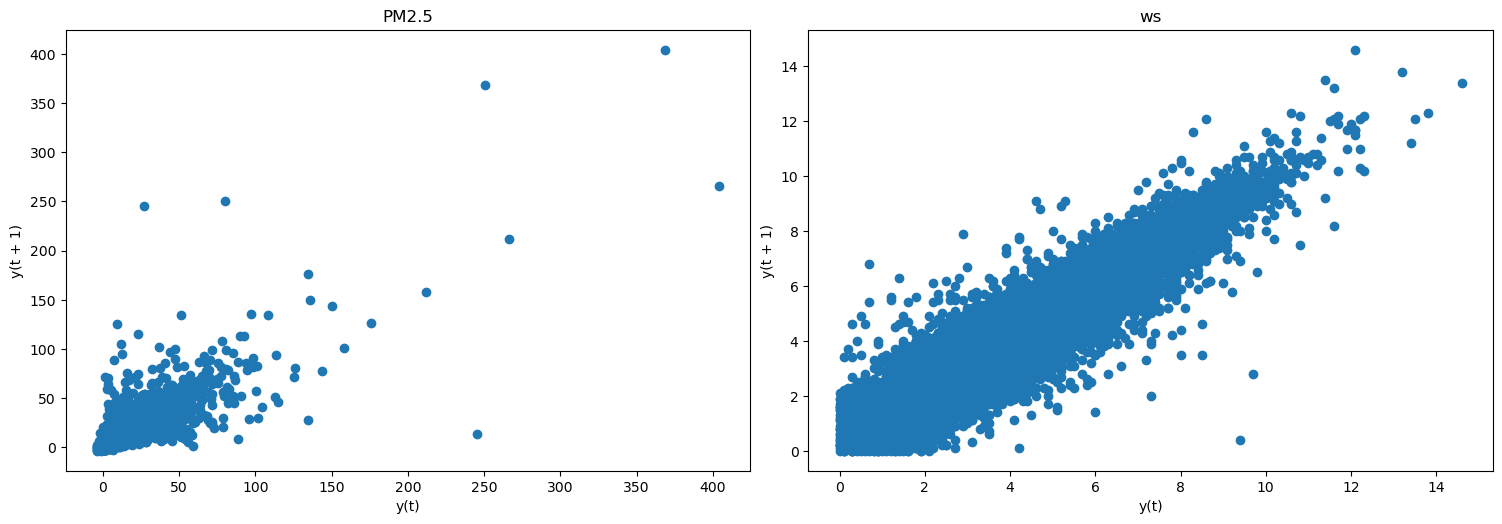

In [18]:
from pandas.plotting import lag_plot
   
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout()

lag_plot(combined_df['PM2.5'], ax=ax1)
ax1.set_title('PM2.5');

lag_plot(combined_df['ws'], ax=ax2)
ax2.set_title('ws');

plt.show()

These graphs show there is clearly some structure to our data as currently provided on an hourly basis. This means it is likely that information on previous hourly values could be useful in determining or forecasting the next hour. We get back to this in the third notebook.  What would a daily lag plot look like? Try to complete this in the exercise below. You can use the dataframe already created earlier, namely <code> subset_df </code>. Also focus on the columns 'SS_PM2.5' and 'BC_Conc' to generate the lag plots. 

<div class="alert alert-block alert-success">
<b> Exercise 3: Generate lag plots the supersite PM2.5 and black carbon <a name="Exercise3"></a> </b> 
    
Modify the code below to produce lag plots for hourly and daily averages for the columns <code> SS_PM2.5 </code> and <code> BC_Conc </code>.

</div>

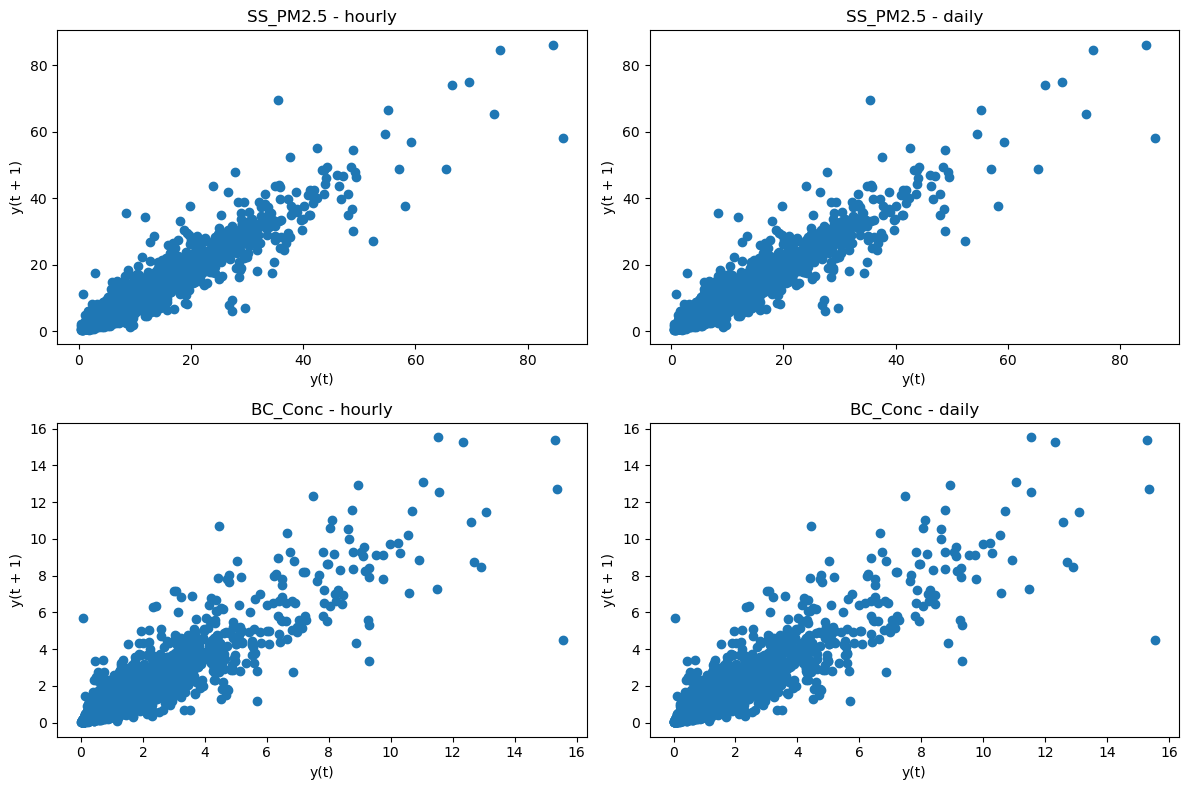

In [19]:
# Extract new dataframe to produce daily averages
daily_df=subset_df[['SS_PM2.5','BC_Conc']].resample("D").mean()

fig, axes = plt.subplots(2,2,figsize=(12,8))
# Produce lag plots
lag_plot(subset_df['SS_PM2.5'], ax=axes[0,0])
lag_plot(subset_df['SS_PM2.5'], ax=axes[0,1])
lag_plot(subset_df['BC_Conc'], ax=axes[1,0])
lag_plot(subset_df['BC_Conc'], ax=axes[1,1])
axes[0,0].set_title('SS_PM2.5 - hourly')
axes[0,1].set_title('SS_PM2.5 - daily')
axes[1,0].set_title('BC_Conc - hourly')
axes[1,1].set_title('BC_Conc - daily')

fig.tight_layout()
plt.show()


There are various levels of stationarity, as you might expect. These can be important when we start to deploy some statistical tests that are used to define whether a series is stationary or not - but they are not always ideal for the data we might have access to. In our air quality data, we often see clearly seasonality in that we patterns emerging over the hours of day and months of the year.   

## 3.2) Seasonality

Many time series display seasonality. By seasonality, we mean periodic fluctuations. For example, retail sales tend to peak for the Christmas season and then decline after the holidays. So time series of retail sales will typically show increasing sales from September through December and declining sales in January and February. We might expect air quality time series to display seasonality. For example, Ozone is higher in the summer months and NO2 should have a singal on a daily scale related to traffic whilst also have a year signal related atmospheric conditions. 

There are multiple ways to check this. These include:

 - Boxplots of diurnal or longer profiles
 - Autocorrrelation plots
 
In exercise 2 you produce a boxplot of diurnal profiles. Can you see a daily signature emerging from these plots? For the second set of tools we take time to describe them and apply them in the following text.


We make continual reference to a time series that is driven by relationships that change with time and those that do not. One way to profile our data in this regards is to explore the strength of relationships between our current observations and those that occurred previously. We use the term lag to refer to $n$ lags prior to the current point in time (e.g. 3 lags could mean 3 hours). Not only does this give us insight into levels of stationarity, but also helps us understand what an appropriate forecasting model might have to consider. For example, should we use the previous 1 or 12 hours? You may then ask, well, if we can access a measure of correlation across different points in time, can we also use this to identify stationary and non-stationary series? It appears the answer is not so clear BUT they are very useful components to identify seasonality. First let us discuss two metrics known as the **Auto-correlation function(ACF)** and **Partial auto-correlation function (PACF)**.

Autocorrelation analysis helps in detecting hidden patterns and seasonality and in checking for randomness. It is especially important when you intend to use a particular model for forecasting because the autocorrelation analysis helps to identify the parameters and suitability of the model. There is slightly more information provided in the course notes; some methods require us to decide how many lagged values we use to predict the next and whether we need to account for a change in trend or not. 

### 3.2.1) Auto-correlation function(ACF) 

The Auto-correlation function (ACF) is the correlation between a time series signal and a lagged version of itself. Recall earlier in section xx we used a definition of stationarity that stated the time series should have constant \textbf{auto correlation} features. That is, data can vary as a function of time but the way in which it varies will not change. The ACF gives us an idea of the persistence, or memory, of that process. Does the influence connect only the previous 3 lags or the past 48? We will look at some examples shortly. Imagine we have measured the concentration of pollutant at time $t=0$ and we start to look at the correlation between the current data and steps before, using intervals of one hour, thus $t_{t-1}$. This can be a useful way of detecting repeated patterns that might otherwise be difficult to detect within the noise of the observation. For our purposes, it can be used to detect non-randomness in a signal and, using that information, build an appropriate time series model.

### 3.2.2) Partial auto-correlation function (PACF)

Partial auto-correlation (PACF) is a little harder to understand, but provides us with very similar insights into our time series data. We still retain information on the correlation between a signal and its lagged version; however this metric attempts to remove the influence of intermediate values. Thus, we remove the effect of the values 12 hours ago on the values from 112 hours ago and so on. The value for the first lag will be the same as the auto-correlation function, but for all other lags it will be different. 

When you do compare a plot for ACF and PACF, you might find, for example, a value at lag 12 remains strong but a value at 24 which was relatively strong in the ACF now becomes weaker in the PACF plot. 

In the following code blocks, we provide example code to generate both ACF and PACF plots in Python for one time-series dataset. In the proceeding example, we ask you to generate the same again but for the range of other time-series found in our dataset.

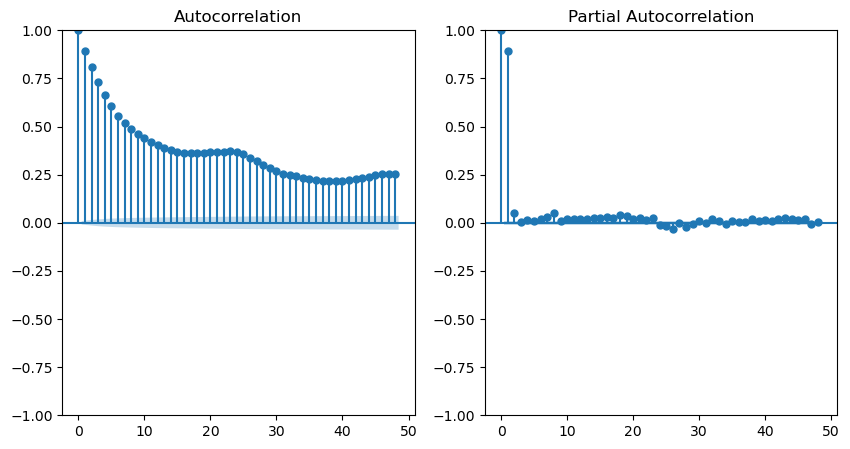

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2,figsize=(10,5))
plot_acf(combined_df['PM2.5'], lags=48, ax=ax[0])
plot_pacf(combined_df['PM2.5'], lags=48, ax=ax[1])
plt.show()

<div class="alert alert-block alert-success">
<b> Exercise 3: Auto-correlation function (ACF) and Partial auto correlation function (PACF) <a name="Exercise3"></a> </b> 
    
Repeat the above code but for measurements of NO2 from Piccadilly. You will find that there are strong and relatively slowly decaying ACF plots, with significant PACF plots a day before current observations.

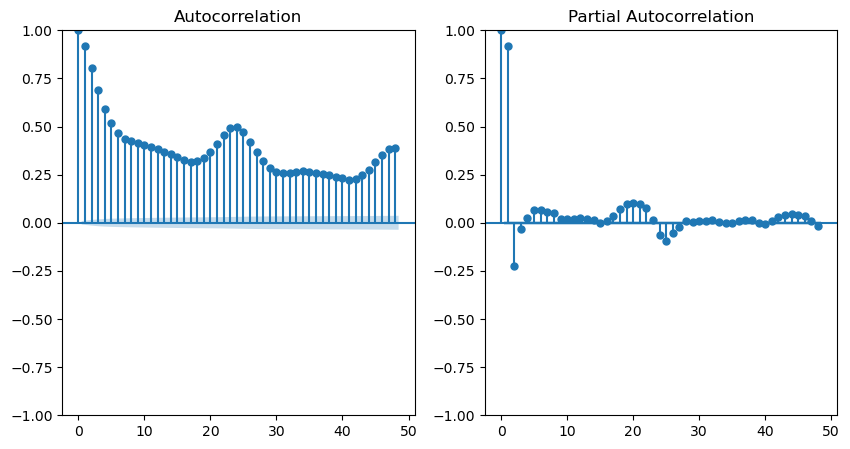

In [21]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
#----------- INSERT CODE HERE ----------------
plot_acf(combined_df['NO2'], lags= , ax=ax[0])
plot_pacf(combined_df['NO2'], lags= , ax=ax[1])
#---------------------------------------------
plt.show()

If we go back to the concept of stationarity; we can use auto and partial correlation functions described in to understand our data a little more. 

Recall we can use auto-correlation as a measure of dependencies between our current observation and observations at certain intervals prior to this point in time. For a completely random time series, the ACF plot would show near 0 values for all lags prior to our current observation. Caution must be applied to interpreting the value of the ACF coefficient but you can make relative comparisons. Imagine we studied a process whereby we knew that there was a strong relationship between our measured variable with that measured at lag 'k'. We could expect the ACF coefficient to be strong to the lag 'k' and, subsequently, the inertia of that relationship could carry on to subsequent lag values, trailing off at some point as the effect was weakened. We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k. Both of these plots would provide us with more understanding on whether a time series if stationary or not, becuase:

 - *if a data set is stationary, we would expect the ACF plot to decay rapidly. In a non-stationary time series, we would expect the decay in ACF to decay more gradually. You can also use ACF and PACF plots to also infer levels of seasonality.* 
 - *When trends are present in a time series, shorter lags typically have large positive correlations because observations closer in time tend to have similar values. The correlations taper off slowly as the lags increase. For time series with trends, the autocorrelations decline slowly.* 
 - *When seasonal patterns are present, the autocorrelations are larger for lags at multiples of the seasonal frequency than for other lags. When a time series has both a trend and seasonality, the ACF plot displays a mixture of both effects. We see this in ACF plots for PM2.5*
 - *Trend stationarity* A  process is trend stationary if an underlying trend (function solely of time) can be removed, leaving a stationary process. We can certainly consider this to be relevant to our data. Figure xx b provides an example below. In the presence of a shock (a significant and rapid one-off change to the value of the series), trend-stationary processes are mean-reverting; i.e. over time, the series will converge again towards the growing (or shrinking) mean, which is not affected by the shock.


It is worthwhile finishing with two more useful definitions:

 - *Difference stationary processes* A process that is difference stationary means we can write it as an *autoregressive process* of order p, denoted as AR(p):
 
 $ y=a_0+a_1y_{t-1}+...+a_py_{t-p}+\varepsilon $

where $\varepsilon$ is a white-noise term. If this fits the data well, this means we can apply differencing to the data to convert it to a stationary process: i.e. remove the dependency on previoys values and thus reduce the autocorrelation. 
- *Unit root processes* A common sub-type of difference stationary process are called unit root processes. Using the above formula, the simplest model would be written as:

 $ y=a_0+a_1y_{t-1}+\varepsilon $

A unit root process are non-stationary processes that can be easily transformed into weakly stationary processes through differencing. 

We wont dive into statistical tests for stationarity here. They require careful consideration, not only about your data, but their underlying parametric asssumptions. In the third notebook for this course, we will fit a model to our data that is able to extract the seasonality and underlying trend.

For now, we move on to casuality tests to finish this notebook.

# 4) Granger Causality coefficients

Correlation coefficients are useful to try and understand data variability, but we need more insights for attributing change. Often that change comes from building time-series models that can be used to look at how pollution varies as a function of other variables. Granger Causality test is a statistical test that is used to determine if a given time series and it’s lags is helpful in explaining the value of another series. 

We use a range of statistical tests in many areas of science. These are used to inform us whether we can reject a null hypothesis. 

<div class="alert alert-block alert-info"> 
    
A null hypothesis represents the assumption that there is no significant relationship or effect between variables or groups under study. The null hypothesis is typically denoted as H0 and serves as a starting point for hypothesis testing.

In hypothesis testing, researchers compare the null hypothesis to an alternative hypothesis (denoted as H1 or Ha), which represents the assumption that there is a significant relationship or effect between the variables or groups being studied. The goal of hypothesis testing is to determine whether there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis.
    
Statistical tests, such as t-tests, chi-square tests, and ANOVA, are used to calculate the probability of observing the data if the null hypothesis were true. This probability is called the p-value. If the p-value is less than a predetermined significance level (usually 0.05), researchers reject the null hypothesis in favor of the alternative hypothesis, concluding that there is a significant relationship or effect. If the p-value is greater than the significance level, there is not enough evidence to reject the null hypothesis, and the relationship or effect is considered not statistically significant.

</div>

In the Granger Causality test, we can state that *a time series X is said to Granger-cause Y if it can be shown, usually through a series of t-tests and F-tests on lagged values of X (and with lagged values of Y also included), that those X values provide statistically significant information about future values of Y. [reference](https://en.wikipedia.org/wiki/Granger_causality)*. Granger causality is not necessarily true causality. We may be missing unobserved variables, for one. It is however another tool to understand time-series data. 

Of course, there is a Python package that does this for us. We import the <code> stats package </code>. In the following we pass our X ['RH'] and Y ['PM2.5'] variable as a list of columns within our dataframe, and define the maximum number of lags to perform the causality test on.

P-Values lesser than the significance level (0.05), implies the Null Hypothesis that the coefficients of the corresponding past values is zero, that is, the hypothesis X *does not* cause Y can be rejected. Lets look at an example and then interrogate the output.

In [22]:
from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
result=grangercausalitytests(combined_df[['PM2.5','RH']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
ssr based F test:         F=1.3434  , p=0.2582  , df_denom=47702, df_num=3
ssr based chi2 test:   chi2=4.0309  , p=0.2581  , df=3
likelihood ratio test: chi2=4.0307  , p=0.2582  , df=3
parameter F test:         F=1.3434  , p=0.2582  , df_denom=47702, df_num=3


There is quite alot of information here. We see 4 statistical tests have been used and each has a P value. Based on the above criteria, a P value less than 0.05 would mean that we can reject the null hypothesis and infer than values for Y ['RH'] might be useful in predicting X ['PM2.5']. Since P values are greater than 0.05 we cant say this is true. In the following code block this capability is wrapped as a general function that can take a list of variables to generate a matrix of P values from the Granger causality test. 

In [23]:
import pdb 
# Function definition taken from https://www.machinelearningplus.com/time-series/granger-causality-test-in-python/

def grangers_causation_matrix(data, variables, maximumlags, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    #pdb.set_trace()
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maximumlags, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maximumlags)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In the following code snippet we call this newly defined function and extract causality coefficients between PM2.5 and relative humidity, defined by 3 maximum lags. The result is a table of P values. In fact the provided P-value is the lowest across all defined lags. We then print to screen.

In [24]:
result=grangers_causation_matrix(combined_df, ['PM2.5','RH'], 3)  
result

/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


,PM2.5_x,RH_x
PM2.5_y,1.0,0.2581
RH_y,0.0,1.0000


<div class="alert alert-block alert-success">
<b> Exercise 4: Generate a Granger Causality test matrix between all pollutants and meteorological variables, using hourly data <a name="Exercise4"></a> </b> 
    
Here you can all the function defined above, using your own maximum lags, for the following variables:
    
   <code> ['SS_PM2.5','438_SS_pm25','454_SS_pm25','459_SS_pm25','461_SS_pm25','RH','BC_Conc','blh_final','t2m','u10','v10']
    </code>
    
Interpret with caution!! Does this mean that measurements of PM2.5 at the supersite are not useful for predicting measured PM2.5 at another site?
    
</div>

In [28]:
# We will need to drop rows that have NaN. We can focus on our subset of variables. Thu:
subset_df1=subset_df[['SS_PM2.5','435_PM2.5','427_PM2.5','461_SS_pm25','RH','BC_Conc','blh_final','t2m','u10','v10']].dropna()  

result=grangers_causation_matrix(subset_df1, ['SS_PM2.5','435_PM2.5','427_PM2.5','461_SS_pm25','RH','BC_Conc','blh_final','t2m','u10','v10'], 3)  
result

/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3/envs/MPEC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/user/opt/anaconda3

,SS_PM2.5_x,435_PM2.5_x,427_PM2.5_x,461_SS_pm25_x,RH_x,BC_Conc_x,blh_final_x,t2m_x,u10_x,v10_x
SS_PM2.5_y,1.0000,0.7347,0.7402,0.0000,0.2778,0.0000,0.2578,0.0002,0.0036,0.0002
435_PM2.5_y,0.9236,1.0000,0.0000,0.9694,0.0403,0.8081,0.1547,0.3855,0.7034,0.6411
427_PM2.5_y,0.7594,0.0233,1.0000,0.8223,0.0114,0.4626,0.2162,0.4070,0.3674,0.6002
461_SS_pm25_y,0.0003,0.8824,0.8181,1.0000,0.3599,0.0000,0.4827,0.0021,0.0131,0.0013
RH_y,0.6754,0.1227,0.2698,0.6918,1.0000,0.1162,0.0000,0.0000,0.0469,0.4707
BC_Conc_y,0.0051,0.2665,0.2474,0.0000,0.2551,1.0000,0.5444,0.0268,0.0038,0.0070
blh_final_y,0.5771,0.7320,0.7650,0.6510,0.0000,0.6823,1.0000,0.0000,0.0374,0.3984
t2m_y,0.0001,0.5729,0.3787,0.0049,0.0000,0.0152,0.0000,1.0000,0.0208,0.1136
u10_y,0.0002,0.3804,0.3325,0.0010,0.3382,0.0034,0.2037,0.5005,1.0000,0.0962
v10_y,0.0000,0.8141,0.8012,0.0002,0.1678,0.0000,0.0016,0.5217,0.0277,1.0000
